In [325]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.optimize import curve_fit
#import mpmath as mm
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    






#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#w without specific declear should of value 10
w = 8.
#theta_e_1 = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 10.
#n_e = 4.
h = 6.6260755e-27
k = 1.380658e-16
T_e = m * c**2 * theta_e / k


#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)

kappa = 3.5
theta = 8. * np.pi / 36.
epsilon = 0.01
n_e = 2.
nu_c = e * B / (2. * np.pi * m * c)
nu = 100 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
nu_k = nu_c * w**2. * np.sin(theta)
nu_w = nu_c * (w * kappa)**2 * np.sin(theta)
#n_e_nt = 2.
#p_PL = 2.2
p_PL = 2.5
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001

gamma_cutoff = 100000000000.
#print nu_c

In [326]:
data_kappa_V_emi_3_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_B_30_T_10_theta_60.txt')

data_kappa_V_emi_3_5_B_30_T_3_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_3_theta_60.txt')
data_kappa_V_emi_3_5_B_30_T_5_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_5_theta_60.txt')
data_kappa_V_emi_3_5_B_30_T_8_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_8_theta_60.txt')

data_kappa_V_emi_3_5_B_30_T_20_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_20_theta_60.txt')
data_kappa_V_emi_3_5_B_30_T_50_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_50_theta_60.txt')
data_kappa_V_emi_3_5_B_30_T_100_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_100_theta_60.txt')


data_kappa_V_emi_3_5_B_10_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_10_T_10_theta_60.txt')
data_kappa_V_emi_3_5_B_20_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_20_T_10_theta_60.txt')
data_kappa_V_emi_3_5_B_50_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_50_T_10_theta_60.txt')
data_kappa_V_emi_3_5_B_100_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_100_T_10_theta_60.txt')


data_kappa_V_emi_3_5_B_30_T_10_theta_10 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_10.txt')
data_kappa_V_emi_3_5_B_30_T_10_theta_20 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_20.txt')
data_kappa_V_emi_3_5_B_30_T_10_theta_30 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_30.txt')
data_kappa_V_emi_3_5_B_30_T_10_theta_40 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_40.txt')
data_kappa_V_emi_3_5_B_30_T_10_theta_50 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_50.txt')

data_kappa_V_emi_3_5_B_30_T_10_theta_70 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_70.txt')
data_kappa_V_emi_3_5_B_30_T_10_theta_75 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_75.txt')
data_kappa_V_emi_3_5_B_30_T_10_theta_80 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_80.txt')
data_kappa_V_emi_3_5_B_30_T_10_theta_85 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_85.txt')



data_kappa_V_emi_3_5_B_30_T_5_theta_20 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_5_theta_20.txt')
data_kappa_V_emi_3_5_B_30_T_20_theta_10 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_20_theta_10.txt')
data_kappa_V_emi_3_5_B_30_T_30_theta_70 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_30_theta_70.txt')



data_kappa_V_emi_3_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_60.txt')
data_kappa_V_emi_3_5_B_30_T_10_theta_60_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_30_T_10_theta_60_n_2.txt')

data_kappa_V_emi_3_5_B_10_T_8_theta_40_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_3_5_B_10_T_8_theta_40_n_2.txt')



data_kappa_V_emi_4_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_4_B_30_T_10_theta_60.txt')
data_kappa_V_emi_4_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_4_5_B_30_T_10_theta_60.txt')


data_kappa_V_emi_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_5_B_30_T_10_theta_60.txt')

data_kappa_V_emi_5_B_40_T_9_theta_75_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_5_B_40_T_9_theta_75_n_2.txt')

data_kappa_V_emi_5_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_5_5_B_30_T_10_theta_60.txt')
data_kappa_V_emi_6_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_6_B_30_T_10_theta_60.txt')
data_kappa_V_emi_6_5_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_6_5_B_30_T_10_theta_60.txt')
data_kappa_V_emi_7_B_30_T_10_theta_60 = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_7_B_30_T_10_theta_60.txt')








In [327]:

def kappa_low(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    norm = 4. * np.pi * special.gamma(kappa-4./3.) / (3.**(7./3.) * special.gamma(kappa-2.))
    dimensional = (n_e * e**2.)/(c * kappa**2. * w**2.)
    ans = norm * dimensional * nu_w * X**(1./3.)
    return ans

def kappa_high(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    term1 = (1./4.) * 3.**((kappa-1.)/2.) * (kappa-2.) * (kappa-1.)
    term2 = special.gamma(kappa/4. - 1./3.) * special.gamma(kappa/4. + 4./3.) 
    term3 = (n_e * e**2. * nu_c * np.sin(theta)) / c
    ans = term1*term2*term3 * X**(-(kappa-2.)/2.)
    return ans




def anu_low(nuratio):
    
    nu = nuratio * nu_c
    
    term1 = n_e * 3. * 3.**(1./6.) * e * (-2. + kappa) * (kappa - 1.) * kappa
    term2 = (2. * np.pi)**(1./3.) * (kappa * w)**(-2. + kappa)
    term3 = (1./np.sin(theta)) * special.gamma(5./3.)
    term4 = special.hyp2f1(-1./3. + kappa, 1. + kappa, 2./3. + kappa, -kappa * w)
    term5 = B*(-1.+3.*kappa)*((m*nu)/(B*e*np.sin(theta)))**(5./3.)
    
    f = term1*term2*term3*term4/term5
    
    
    return f
    

    
    
def anu_high(nuratio):
    
    nu = nuratio * nu_c
    
    term1 = n_e/(3. * B * (2. + kappa))
    term2 = 2.**((-1./2.) - kappa) * e * (- 2. + kappa ) * (-1. + kappa) * kappa
    term3 = np.pi**(1. - kappa) * (kappa * w)**(-2. + kappa)
    term4 = 1./np.sin(theta)
    term5 = 2.**(1. + kappa/2.) * np.pi**(kappa/2.) * special.gamma(2. + kappa/2.)
    term6 = 2**(1. + kappa/2.) * np.pi**(kappa/2.) + kappa * (2. * np.pi)**(kappa/2.)
    term7 = special.gammainc(1. + kappa/2., 2. * c * m * nu * np.pi / (B * e * np.sin(theta)))
    term8 = (B * e * np.sin(theta)/(c * m * nu))**((3. + kappa)/2.)
    
    f = term1 * term2 * term3 * term4 * (term5 - term6 * term7) * term8

    return f


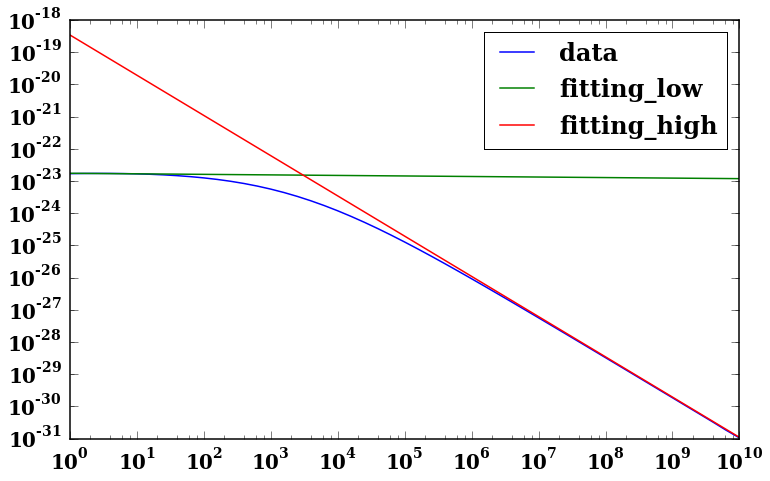

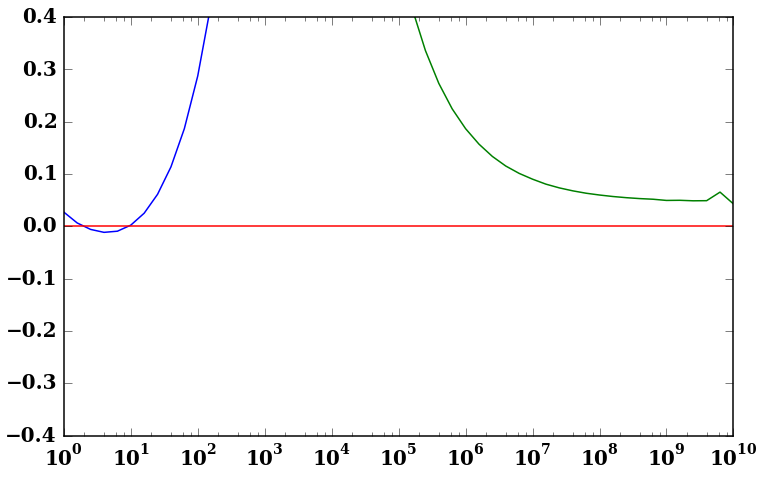

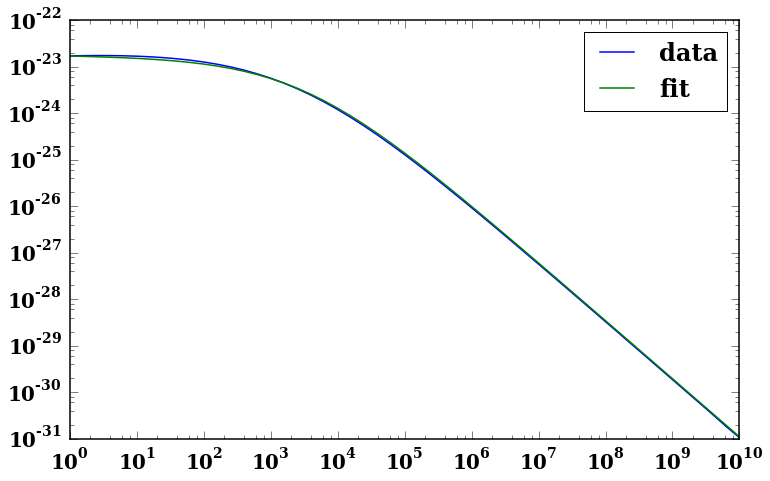

(-0.4, 0.4)

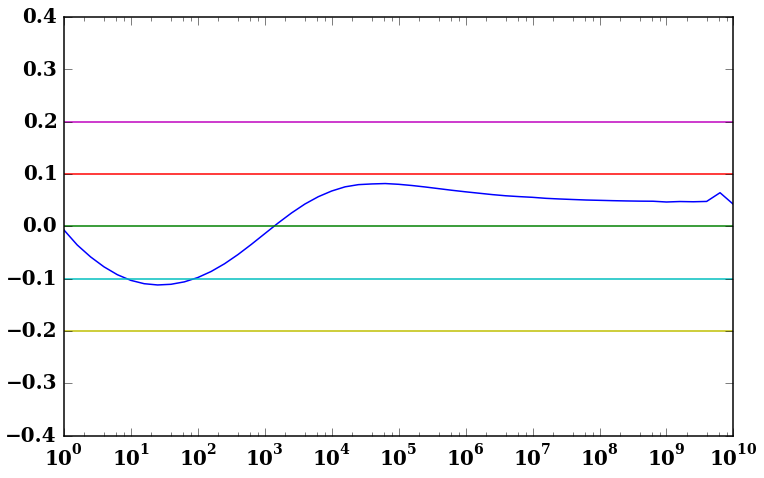

In [328]:
x_6 = data_kappa_V_emi_3_5_B_10_T_8_theta_40_n_2[:,0]
y_6 = -data_kappa_V_emi_3_5_B_10_T_8_theta_40_n_2[:,1]

AA =  23./625. * kappa**(-66./125.)
BB = -7./20.

WDEPEN = 10./w

THETADEPEN_LOW =   2.33161181 * (np.sin(theta))**(-0.96095552) + (-0.6510187) * (np.sin(theta))**(13.07954496) + -1.53974311
THETADEPEN_HIGH = 1.0917106 * (np.sin(theta))**(-1.24009336) + (-1.29734966) * (np.sin(theta))**(3.68515122) + 0.42791706




def kappa_low_27(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    f = THETADEPEN_LOW * WDEPEN * AA * kappa_low(nuratio) * X**(BB)
    return f

CC = (21./400.) * kappa**(-11./25.)
DD = -1./2.

def kappa_high_150(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    
    f = THETADEPEN_HIGH * WDEPEN * CC * kappa_high(nuratio) * X**(DD)
    return f


pl.loglog(x_6, y_6, label = 'data')

pl.loglog(x_6, kappa_low_27(x_6), label = 'fitting_low')
pl.loglog(x_6, kappa_high_150(x_6), label = 'fitting_high')

pl.legend()
pl.show()

pl.semilogx(x_6, kappa_low_27(x_6)/y_6 - 1.)
pl.semilogx(x_6, kappa_high_150(x_6)/y_6 - 1.)
pl.semilogx(x_6, 0*x_6)
pl.ylim([-0.4,0.4])

pl.show()

PRE = 13./5. * kappa**(-(6./5.)**2.)

def total_fitting_emi(nuratio):
    
    term1 = kappa_low_27(nuratio)
    term2 = kappa_high_150(nuratio)
    
    f= (1./((1./term1)**(PRE) + (1./term2)**(PRE)))**(1./PRE)
    
    return f

#print curve_fit(total_fitting_emi, x_6, y_6)
    
pl.loglog(x_6, y_6, label = 'data')
pl.loglog(x_6, total_fitting_emi(x_6), label = 'fit')
pl.legend()
pl.show()

pl.semilogx(x_6,total_fitting_emi(x_6)/y_6 - 1.)
pl.semilogx(x_6, 0*x_6)
pl.semilogx(x_6, 0*x_6 + 0.1)
pl.semilogx(x_6, 0*x_6 - 0.1)
pl.semilogx(x_6, 0*x_6 + 0.2)
pl.semilogx(x_6, 0*x_6 - 0.2)
pl.ylim([-0.4,0.4])



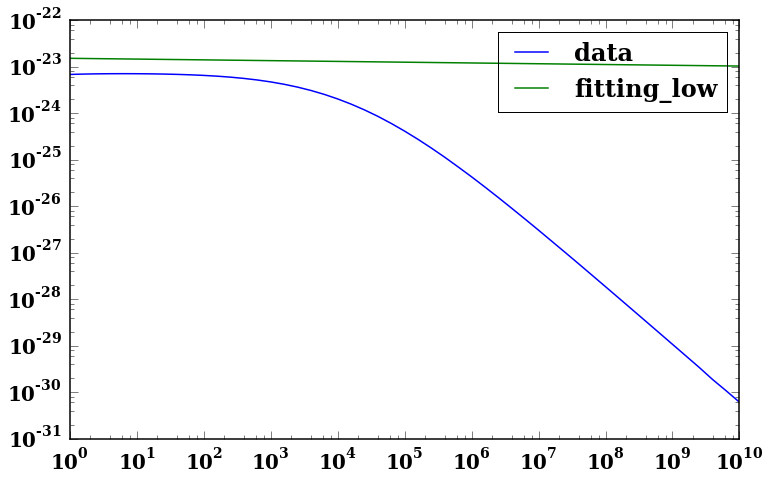

(-0.4, 0.4)

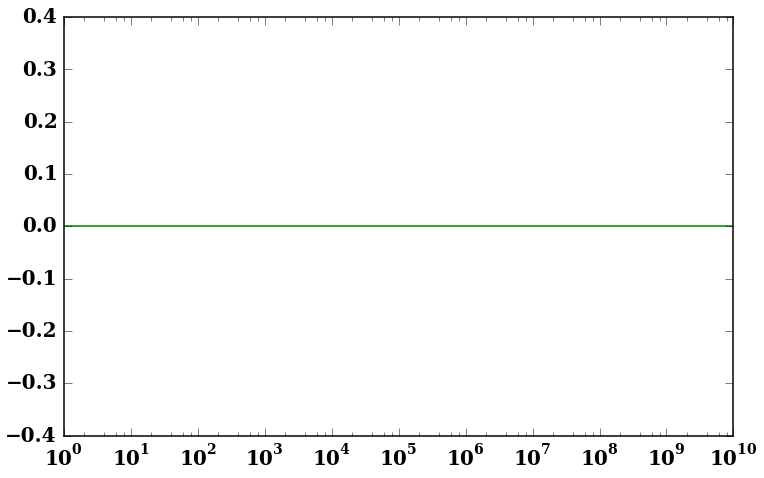

In [103]:
x_7 = data_kappa_V_emi_3_5_B_30_T_10_theta_60[:,0]
y_7 = -data_kappa_V_emi_3_5_B_30_T_20_theta_60[:,1]




AA =  0.22
BB = -7./20.

def kappa_low_27(nuratio):
    f = AA*kappa_low(nuratio) * nuratio**(BB)
    return f


pl.loglog(x_7, y_7, label = 'data')
pl.loglog(x_7, kappa_low_27(x_7), label = 'fitting_low')




#pl.xlim([0, 1e4])
#pl.ylim([1e-24, 1e-22])


pl.legend()
pl.show()

pl.semilogx(x_7, kappa_low_27(x_7)/y_7 - 1.)
pl.semilogx(x_7, 0*x_7)

pl.ylim([-0.4, 0.4])





In [144]:
2.2/160,-28./80.

(0.013750000000000002, -0.35)

(array([ 109.73151336,    0.15071018]), array([[  3.69635923e+00,  -2.05332033e-02],
       [ -2.05332033e-02,   1.17259566e-04]]))


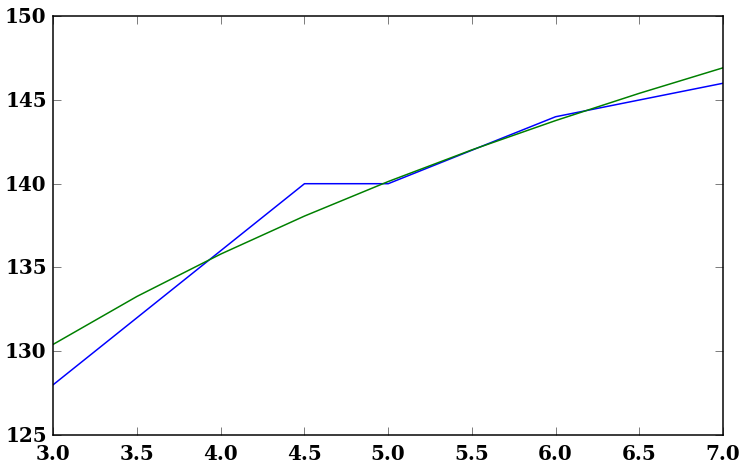

In [450]:
data_kappa_V_emi_low_AA = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_low_AA.txt')

x_115 = data_kappa_V_emi_low_AA[:,0]
y_115 = data_kappa_V_emi_low_AA[:,1]

def func_115(x,a,b):
    f = a * x**b
    return f

print curve_fit(func_115, x_115, y_115)

pl.plot(x_115, y_115)
pl.plot(x_115, func_115(x_115,  111.73151336,    0.14071018))
#pl.plot(x_115, func_115(x_115, 23./625., -66./125.))


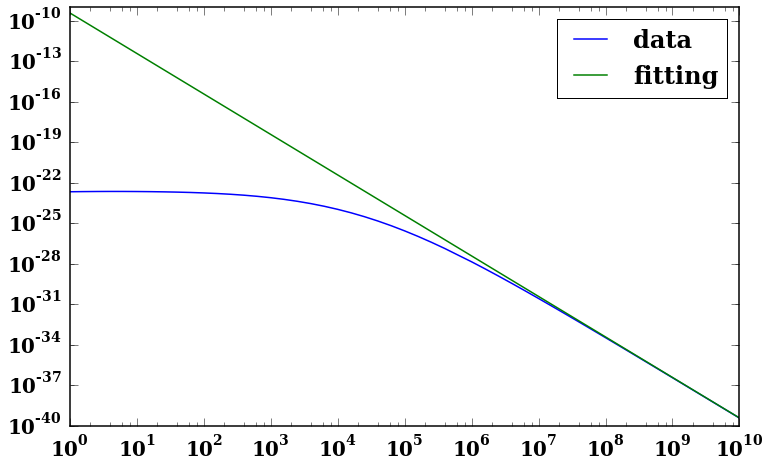

(-0.4, 0.4)

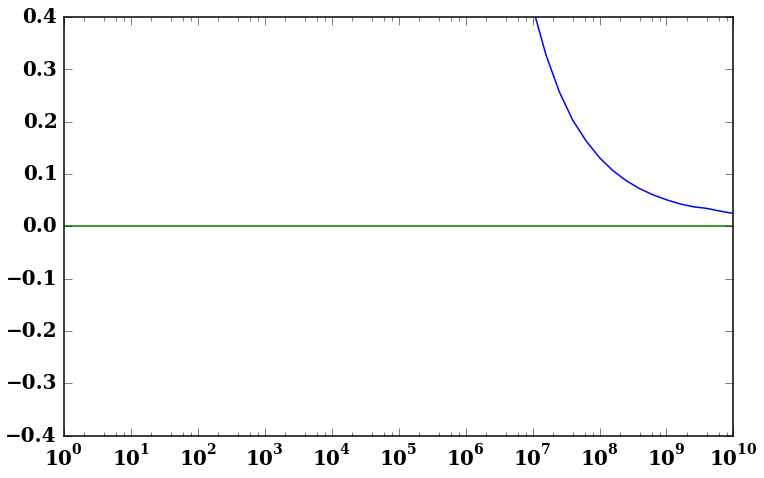

In [274]:
x_150 = data_kappa_V_emi_7_B_30_T_10_theta_60[:,0]
y_150 = -data_kappa_V_emi_7_B_30_T_10_theta_60[:,1]



CC = (21./400.) * kappa**(-11./25.)
DD = -1./2.

def kappa_high_150(nuratio):
    nu = nuratio * nu_c
    X = nu/nu_w
    
    f = CC * kappa_high(nuratio) * X**(DD)
    return f
    

pl.loglog(x_150, y_150, label = 'data')
pl.loglog(x_150, kappa_high_150(x_150), label = 'fitting')

#pl.xlim([1e3, 1e10])
#pl.ylim([1e-30, 1e-21])

pl.legend()
pl.show()

pl.semilogx(x_150, kappa_high_150(x_150)/y_150 - 1.)
pl.semilogx(x_150, 0*x_150)

pl.ylim([-0.4,0.4])



In [185]:
3.05/100, -20./40.

(0.0305, -0.5)

(array([ 0.05245555, -0.44108136]), array([[  5.02328954e-07,  -6.14602898e-06],
       [ -6.14602898e-06,   7.77318175e-05]]))


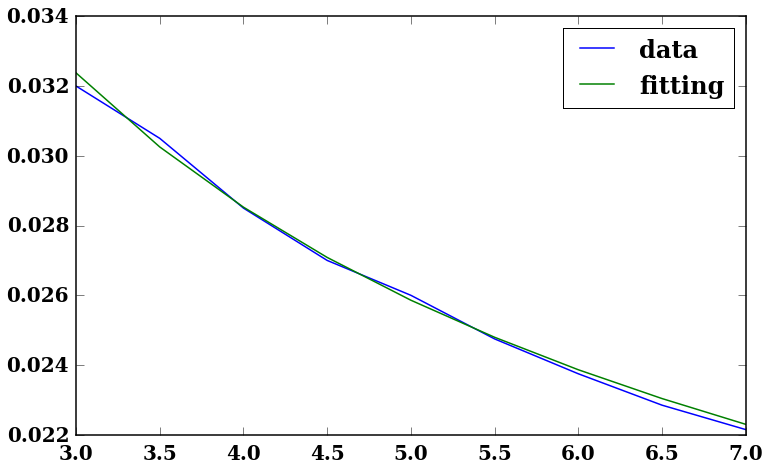

In [262]:
data_kappa_V_emi_low_CC = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_low_CC.txt')
x_186 = data_kappa_V_emi_low_CC[:,0]
y_186 = data_kappa_V_emi_low_CC[:,1]

def func_225(x,a,b):
    f = a * x**b
    return f

print curve_fit(func_225, x_186, y_186)


pl.plot(x_186, y_186, label = 'data')
pl.plot(x_186, func_225(x_186, 21./400., -11./25.), label = 'fitting')

pl.legend()


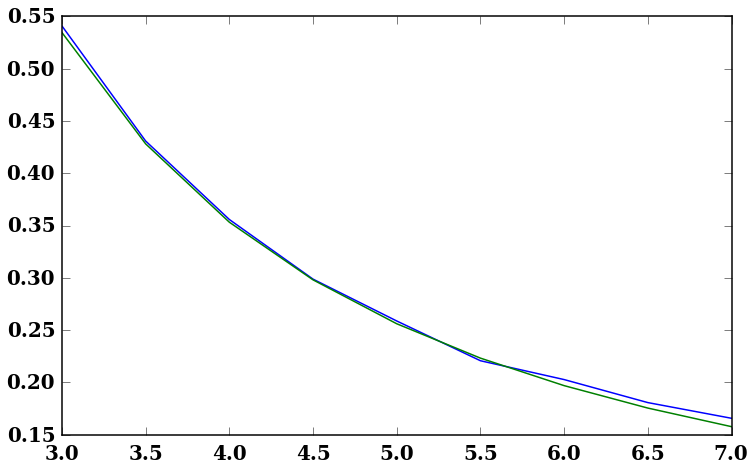

In [361]:
data_kappa_V_emi_PRE_fit = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_emi_PRE_fit.txt')
x_263 = data_kappa_V_emi_PRE_fit[:,0]
y_263 = data_kappa_V_emi_PRE_fit[:,1]

pl.plot(x_263, y_263)

def func_357(x,a,b):
    f = a * x**b
    return f

curve_fit(func_357, x_263, y_263)

pl.plot(x_263, func_357(x_263, 13./5. , -(6./5.)**2.))




In [513]:
20**(-7./10.)

0.12282280261157906

(array([  2.33161181,  -0.96095552,  -0.6510187 ,  13.07954496,  -1.53974311]), array([[  2.35717429e-02,   4.42265389e-03,   6.20365050e-03,
          2.64965066e-01,  -3.09393380e-02],
       [  4.42265389e-03,   8.34391527e-04,   1.13839465e-03,
          4.80513633e-02,  -5.77057170e-03],
       [  6.20365050e-03,   1.13839465e-03,   2.99094853e-03,
          5.33200409e-02,  -8.54080921e-03],
       [  2.64965066e-01,   4.80513633e-02,   5.33200409e-02,
          7.18305546e+00,  -3.75277914e-01],
       [ -3.09393380e-02,  -5.77057170e-03,  -8.54080921e-03,
         -3.75277914e-01,   4.11578273e-02]]))
[ 0.17364818  0.34202014  0.5         0.64278761  0.76604444  0.8660254
  0.93969262  0.96592583  0.98480775  0.9961947 ]


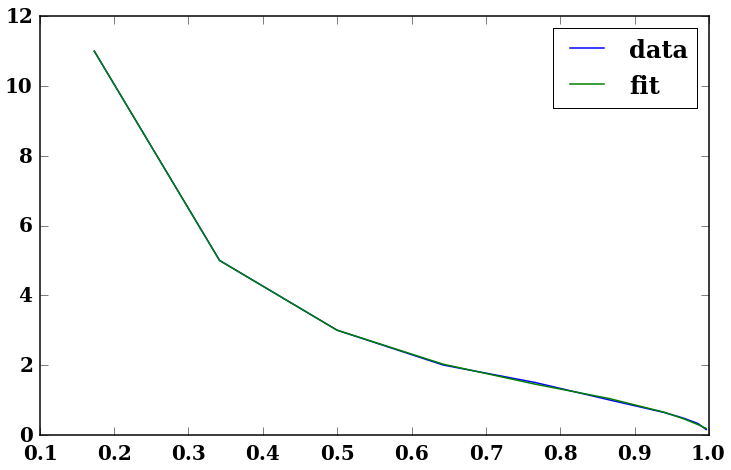

In [294]:
data_kappa_V_low_theta_fit = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_low_theta_fit.txt')

x_514 = np.sin(data_kappa_V_low_theta_fit[:,0] * np.pi /180)
y_514 = data_kappa_V_low_theta_fit[:,1]

def func_130(x,a,b, d, e, f):
    f = a * x**b + d * x**e + f
    return f

print curve_fit(func_130, x_514, y_514, p0 = [ 2.33161089,  -0.96095568,  -0.65101889,  13.07951942,  -1.53974179])


pl.plot(x_514, y_514, label = 'data')
pl.plot(x_514, func_130(x_514,  2.33161181,  -0.96095552,  -0.6510187 ,  13.07954496,  -1.53974311), label = 'fit')


pl.legend()


print x_514

(array([ 1.0917106 , -1.24009336, -1.29734966,  3.68515122,  0.42791706]), array([[ 0.36309384,  0.147023  ,  0.35346741,  1.20560026, -0.72988375],
       [ 0.147023  ,  0.05961558,  0.14235994,  0.48288496, -0.29465959],
       [ 0.35346741,  0.14235994,  0.35606899,  1.23026257, -0.72151537],
       [ 1.20560026,  0.48288496,  1.23026257,  4.7013134 , -2.5044438 ],
       [-0.72988375, -0.29465959, -0.72151537, -2.5044438 ,  1.480084  ]]))


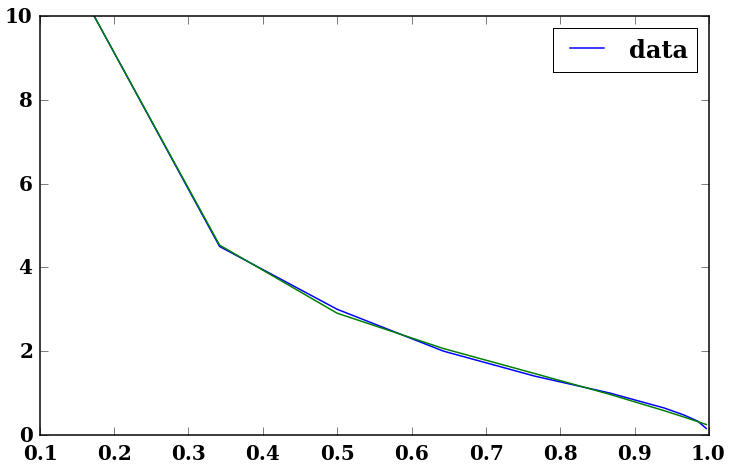

In [291]:
data_kappa_V_high_theta_fit = np.loadtxt('/home/zhaowei/Documents/data_summer/V_mode/kappa_V_high_theta_fit.txt')

x_145 = np.sin(data_kappa_V_high_theta_fit[:,0] * np.pi / 180.)
y_145 = data_kappa_V_high_theta_fit[:,1]

pl.plot(x_145, y_145, label = 'data')

def func_145(x,a,b,d, e, f):
    f = a * x**b + d * x**e + f
    return f

print curve_fit(func_145, x_145, y_145, p0 = [ 1.09166947, -1.24010985, -1.29739143,  3.68499327,  0.42800222])

pl.plot(x_145, func_145(x_145, 1.0917106 , -1.24009336, -1.29734966,  3.68515122,  0.42791706))


pl.legend()





In [270]:
print np.sin(16. * np.pi /36.)

0.984807753012
